## 1. 데이터 탐색
### 1) 데이터 로드

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
data_dir = os.getcwd()

train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv')


train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('train 데이터 shape:', train.shape)
print('test 데이터 shape:',test.shape)

train 데이터 shape: (3000, 24)
test 데이터 shape: (2000, 23)


In [3]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


### 2) 각 변수의 의미 파악
0. id : 샘플 아이디
1. Gender : 성별
2. Customer Type : Disloyal 또는 Loyal 고객
3. Age : 나이
4. Type of Travel : Business 또는 Personal Travel
5. Class : 등급
6. Flight Distance : 비행 거리
7. Seat comfort : 좌석 만족도
8. Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
9. Food and drink : 식음료 만족도
10. Gate location : 게이트 위치 만족도
11. Inflight wifi service : 기내 와이파이 서비스 만족도
12. Inflight entertainment : 기내 엔터테인먼트 만족도
13. Online support : 온라인 지원 만족도
14. Ease of Online booking : 온라인 예매 편리성 만족도
15. On-board service : 탑승 서비스 만족도
16. Leg room service : Leg room 서비스 만족도
17. Baggage handling : 수하물 처리 만족도
18. Checkin service : 체크인 서비스 만족도
19. Cleanliness : 청결도 만족도
20. Online boarding : 온라인보딩 만족도
21. Departure Delay in Minutes : 출발 지연 시간
22. Arrival Delay in Minutes : 도착 지연 시간
23. target : 만족 여부

In [4]:
# data = train + test
data = pd.concat((train, test), axis = 0)

print(len(data))

5000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 5000 non-null   int64  
 1   Gender                             5000 non-null   object 
 2   Customer Type                      5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Type of Travel                     5000 non-null   object 
 5   Class                              5000 non-null   object 
 6   Flight Distance                    5000 non-null   int64  
 7   Seat comfort                       5000 non-null   int64  
 8   Departure/Arrival time convenient  5000 non-null   int64  
 9   Food and drink                     5000 non-null   int64  
 10  Gate location                      5000 non-null   int64  
 11  Inflight wifi service              5000 non-null   int64

### 3) 라벨(target)의 분포 확인

<AxesSubplot:xlabel='target', ylabel='count'>

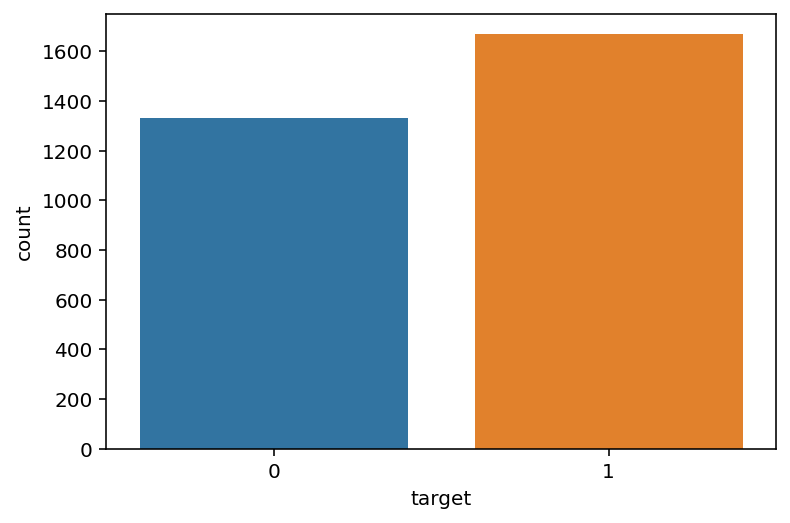

In [6]:
sns.countplot(x='target', data=train)

### 4) 범주형 변수 시각화
* Gender                              
* Customer Type                      
* Type of Travel                    
* Class                              

Male      1502
Female    1498
Name: Gender, dtype: int64


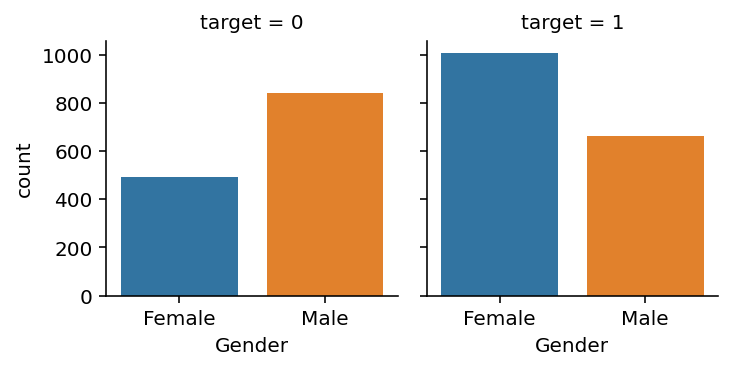

In [7]:
sns.catplot("Gender", col="target", data=train, kind="count", height=2.5)
print(train['Gender'].value_counts())

# 여성들의 만족도가 높음

Loyal Customer       2489
disloyal Customer     511
Name: Customer Type, dtype: int64


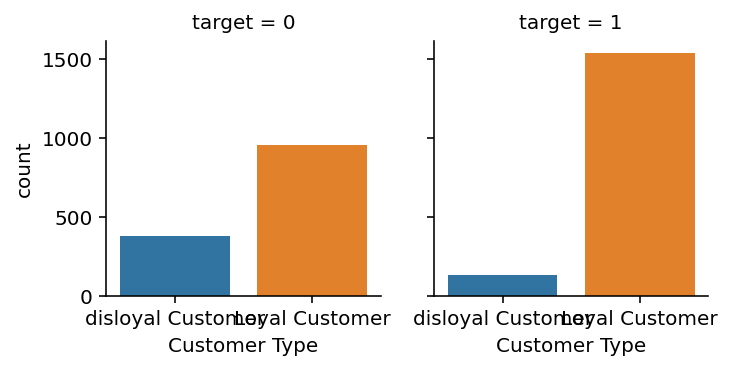

In [8]:
sns.catplot("Customer Type", col="target", data=train, kind="count", height=2.5)  
print(train['Customer Type'].value_counts())

# 충성고객의 만족도 높음, 충성고객의 모수가 많음

Business    1434
Eco         1337
Eco Plus     229
Name: Class, dtype: int64


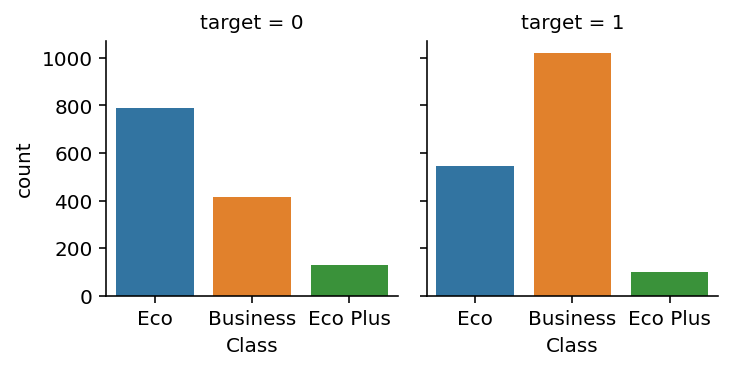

In [9]:
sns.catplot("Class", col="target", data=train, kind="count", height=2.5)  
print(train['Class'].value_counts())

# Business Class 만족도 높음, 나머지 낮거나 비슷함
# Eco Plus Class 모수 적음, 만족도 비슷함

Business travel    2053
Personal Travel     947
Name: Type of Travel, dtype: int64


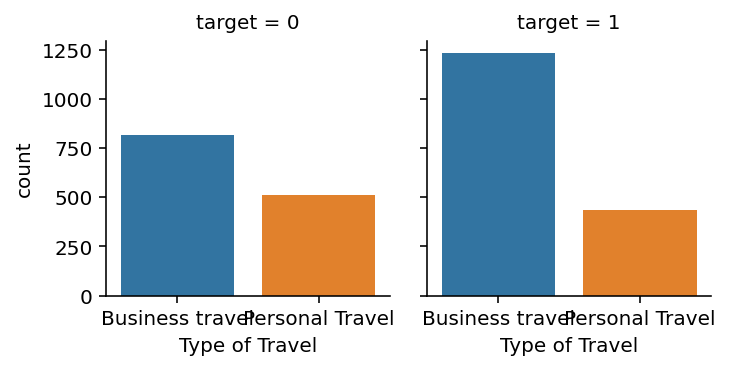

In [10]:
sns.catplot("Type of Travel", col="target", data=train, kind="count", height=2.5)  
print(train['Type of Travel'].value_counts())

# Business Travel 만족도 높음, Personal Travel 만족도 비슷함
# Business Travel 모수 많음

### 5) 연속형 변수 시각화
* Age                               
* Flight Distance                    
* Departure Delay in Minutes      
* Arrival Delay in Minutes       

target
0    37.39039
1    40.65048
Name: Age, dtype: float64


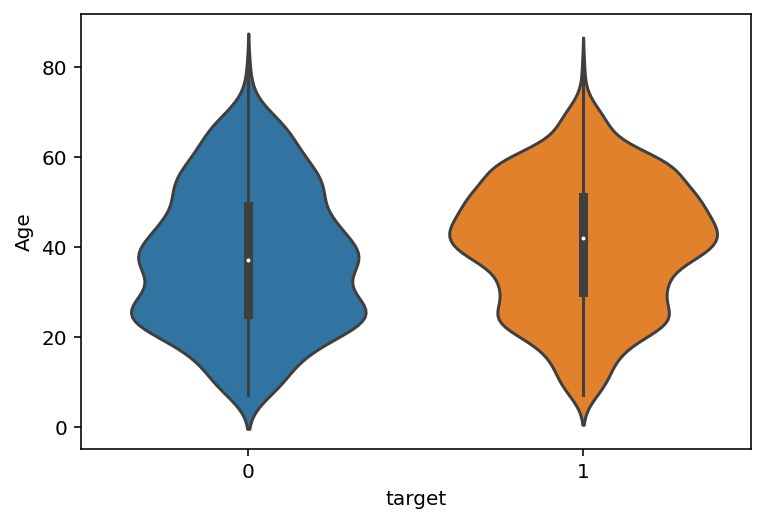

In [11]:
sns.violinplot(x="target", y="Age", data=train)

age = train['Age'].groupby(train['target'])
print(age.mean())

# 만족한 승객과 불만족한 승객 간 다소 나이 분포 차이가 발견됨

target
0    2042.963213
1    1935.258393
Name: Flight Distance, dtype: float64


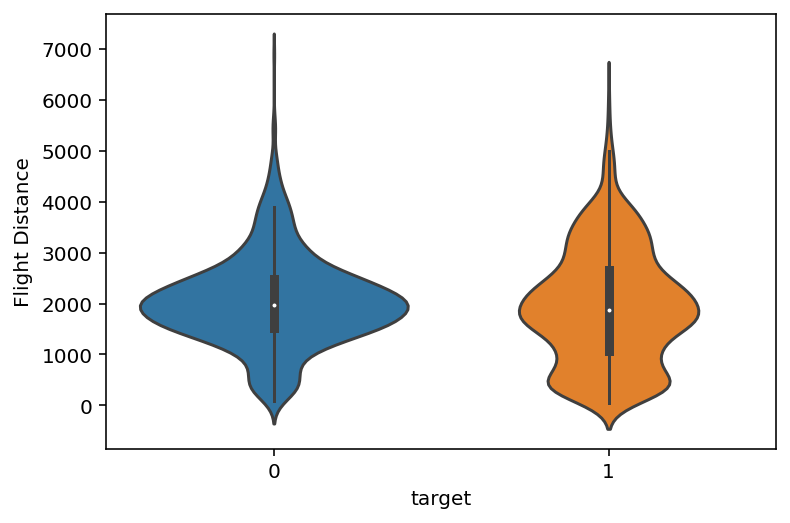

In [12]:
sns.violinplot(x="target", y="Flight Distance", data=train)

distance = train['Flight Distance'].groupby(train['target'])
print(distance.mean())

평균: target
0    20.929429
1    11.405875
Name: Departure Delay in Minutes, dtype: float64 

중앙값: target
0    0
1    0
Name: Departure Delay in Minutes, dtype: int64 

최대값: target
0    1128
1     435
Name: Departure Delay in Minutes, dtype: int64 



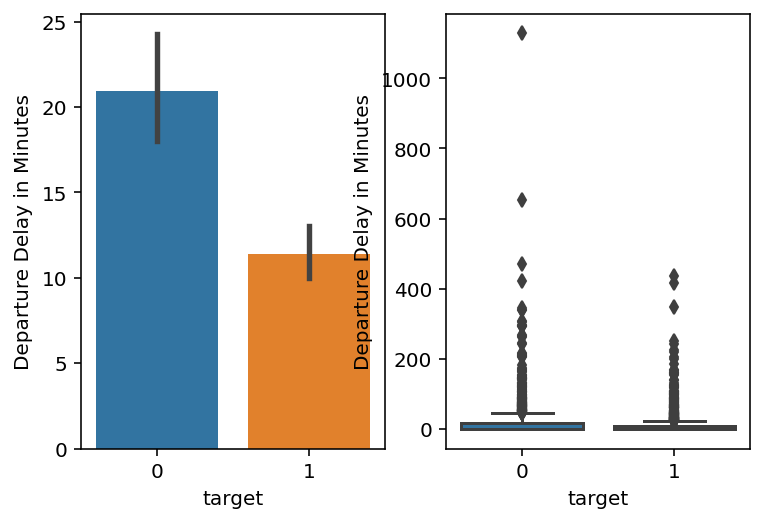

In [13]:
f, ax = plt.subplots(1, 2)
sns.barplot(x="target", y="Departure Delay in Minutes", data=train, ax = ax[0])
sns.boxplot(x="target", y="Departure Delay in Minutes", data=train, ax = ax[1])

D_delay = train['Departure Delay in Minutes'].groupby(train['target'])
print("평균:", D_delay.mean(), '\n')
print("중앙값:", D_delay.median(), '\n')
print("최대값:", D_delay.max(), '\n')

# 이상치 다수 발견됨
# 중앙값이 0이므로 대부분의 승객에게 출발 지연은 없었음

평균: target
0    21.603604
1    11.384892
Name: Arrival Delay in Minutes, dtype: float64 

중앙값: target
0    1.0
1    0.0
Name: Arrival Delay in Minutes, dtype: float64 

최대값: target
0    1115.0
1     470.0
Name: Arrival Delay in Minutes, dtype: float64 



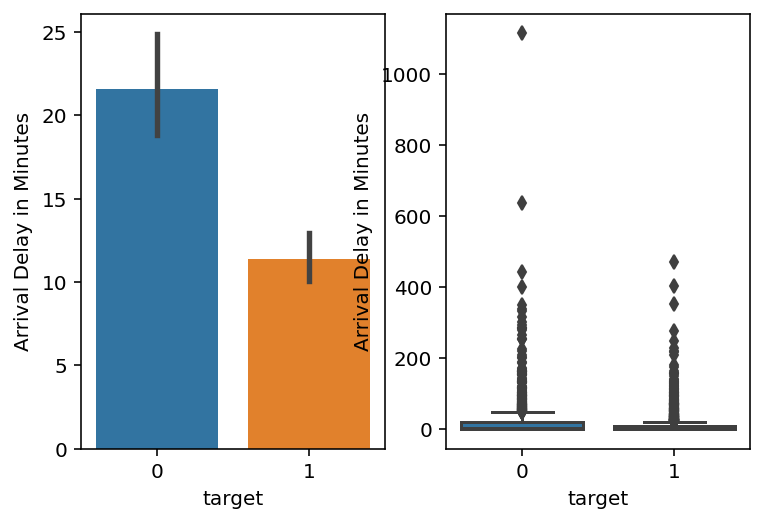

In [14]:
f, ax = plt.subplots(1, 2)
sns.barplot(x="target", y="Arrival Delay in Minutes", data=train, ax = ax[0])
sns.boxplot(x="target", y="Arrival Delay in Minutes", data=train, ax = ax[1])

A_delay = train['Arrival Delay in Minutes'].groupby(train['target'])
print("평균:", A_delay.mean(), '\n')
print("중앙값:", A_delay.median(), '\n')
print("최대값:", A_delay.max(), '\n')

# 이상치 다수 발견
# Departure delay와 연관이 있을 수 밖에 없음

In [15]:
q1=train["Arrival Delay in Minutes"].quantile(0.25)
q2=train["Arrival Delay in Minutes"].quantile(0.5)
q3=train["Arrival Delay in Minutes"].quantile(0.75)
iqr=q3-q1
print(q1, q2, q3, iqr)

0.0 0.0 13.0 13.0


In [16]:
outlier=train['Arrival Delay in Minutes']>q3+1.5*iqr

In [17]:
a=train[outlier].index
train.drop(a,inplace=True)

In [18]:
train.shape

(2595, 24)

평균: target
0    4.727356
1    4.219041
Name: Departure Delay in Minutes, dtype: float64 

중앙값: target
0    0
1    0
Name: Departure Delay in Minutes, dtype: int64 

최대값: target
0    52
1    52
Name: Departure Delay in Minutes, dtype: int64 



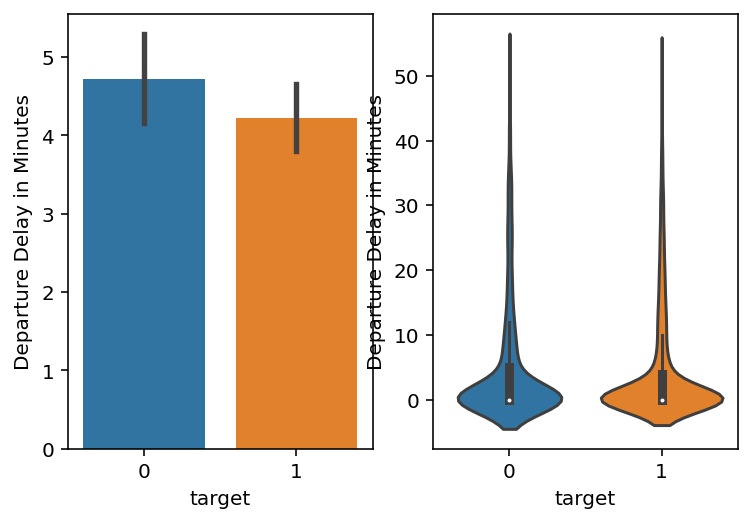

In [19]:
f, ax = plt.subplots(1, 2)
sns.barplot(x="target", y="Departure Delay in Minutes", data=train, ax = ax[0])
sns.violinplot(x="target", y="Departure Delay in Minutes", data=train, ax = ax[1])

D_delay = train['Departure Delay in Minutes'].groupby(train['target'])
print("평균:", D_delay.mean(), '\n')
print("중앙값:", D_delay.median(), '\n')
print("최대값:", D_delay.max(), '\n')

# 이상치 제거 후 시각화 결과, 만족 고객과 불만족 고객의 차이가 크지 않았음

평균: target
0    4.646844
1    3.610519
Name: Arrival Delay in Minutes, dtype: float64 

중앙값: target
0    0.0
1    0.0
Name: Arrival Delay in Minutes, dtype: float64 

최대값: target
0    32.0
1    32.0
Name: Arrival Delay in Minutes, dtype: float64 



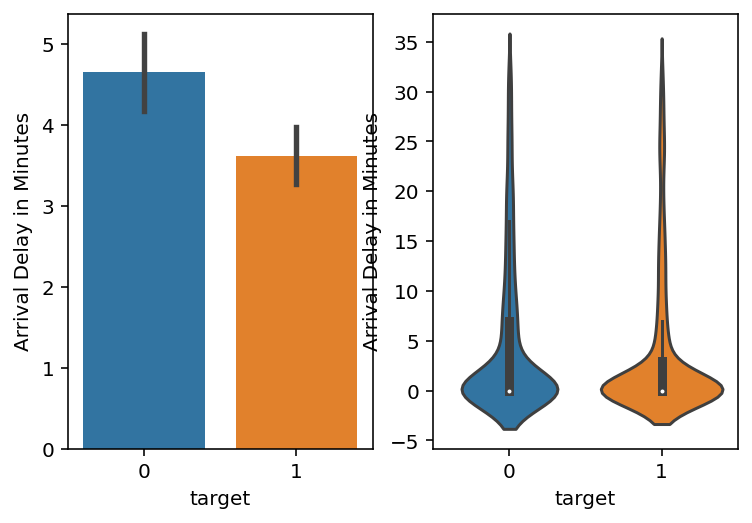

In [20]:
f, ax = plt.subplots(1, 2)
sns.barplot(x="target", y="Arrival Delay in Minutes", data=train, ax = ax[0])
sns.violinplot(x="target", y="Arrival Delay in Minutes", data=train, ax = ax[1])

A_delay = train['Arrival Delay in Minutes'].groupby(train['target'])
print("평균:", A_delay.mean(), '\n')
print("중앙값:", A_delay.median(), '\n')
print("최대값:", A_delay.max(), '\n')

# Departure Delay in Minutes에서 이상치를 제거한 효과가 같이 나타남
# 평균의 격차가 더 많이 벌어지고 있음

### 6) 이산형 변수 시각화               
* Seat comfort                       
* Departure/Arrival time convenient 
* Food and drink                     
* Gate location                       
* Inflight wifi service              
* Inflight entertainment        
* Online support                     
* Ease of Online booking      
* On-board service                     
* Leg room service               
* Baggage handling                 
* Checkin service                 
* Cleanliness                    
* Online boarding                   

<AxesSubplot:xlabel='target', ylabel='count'>

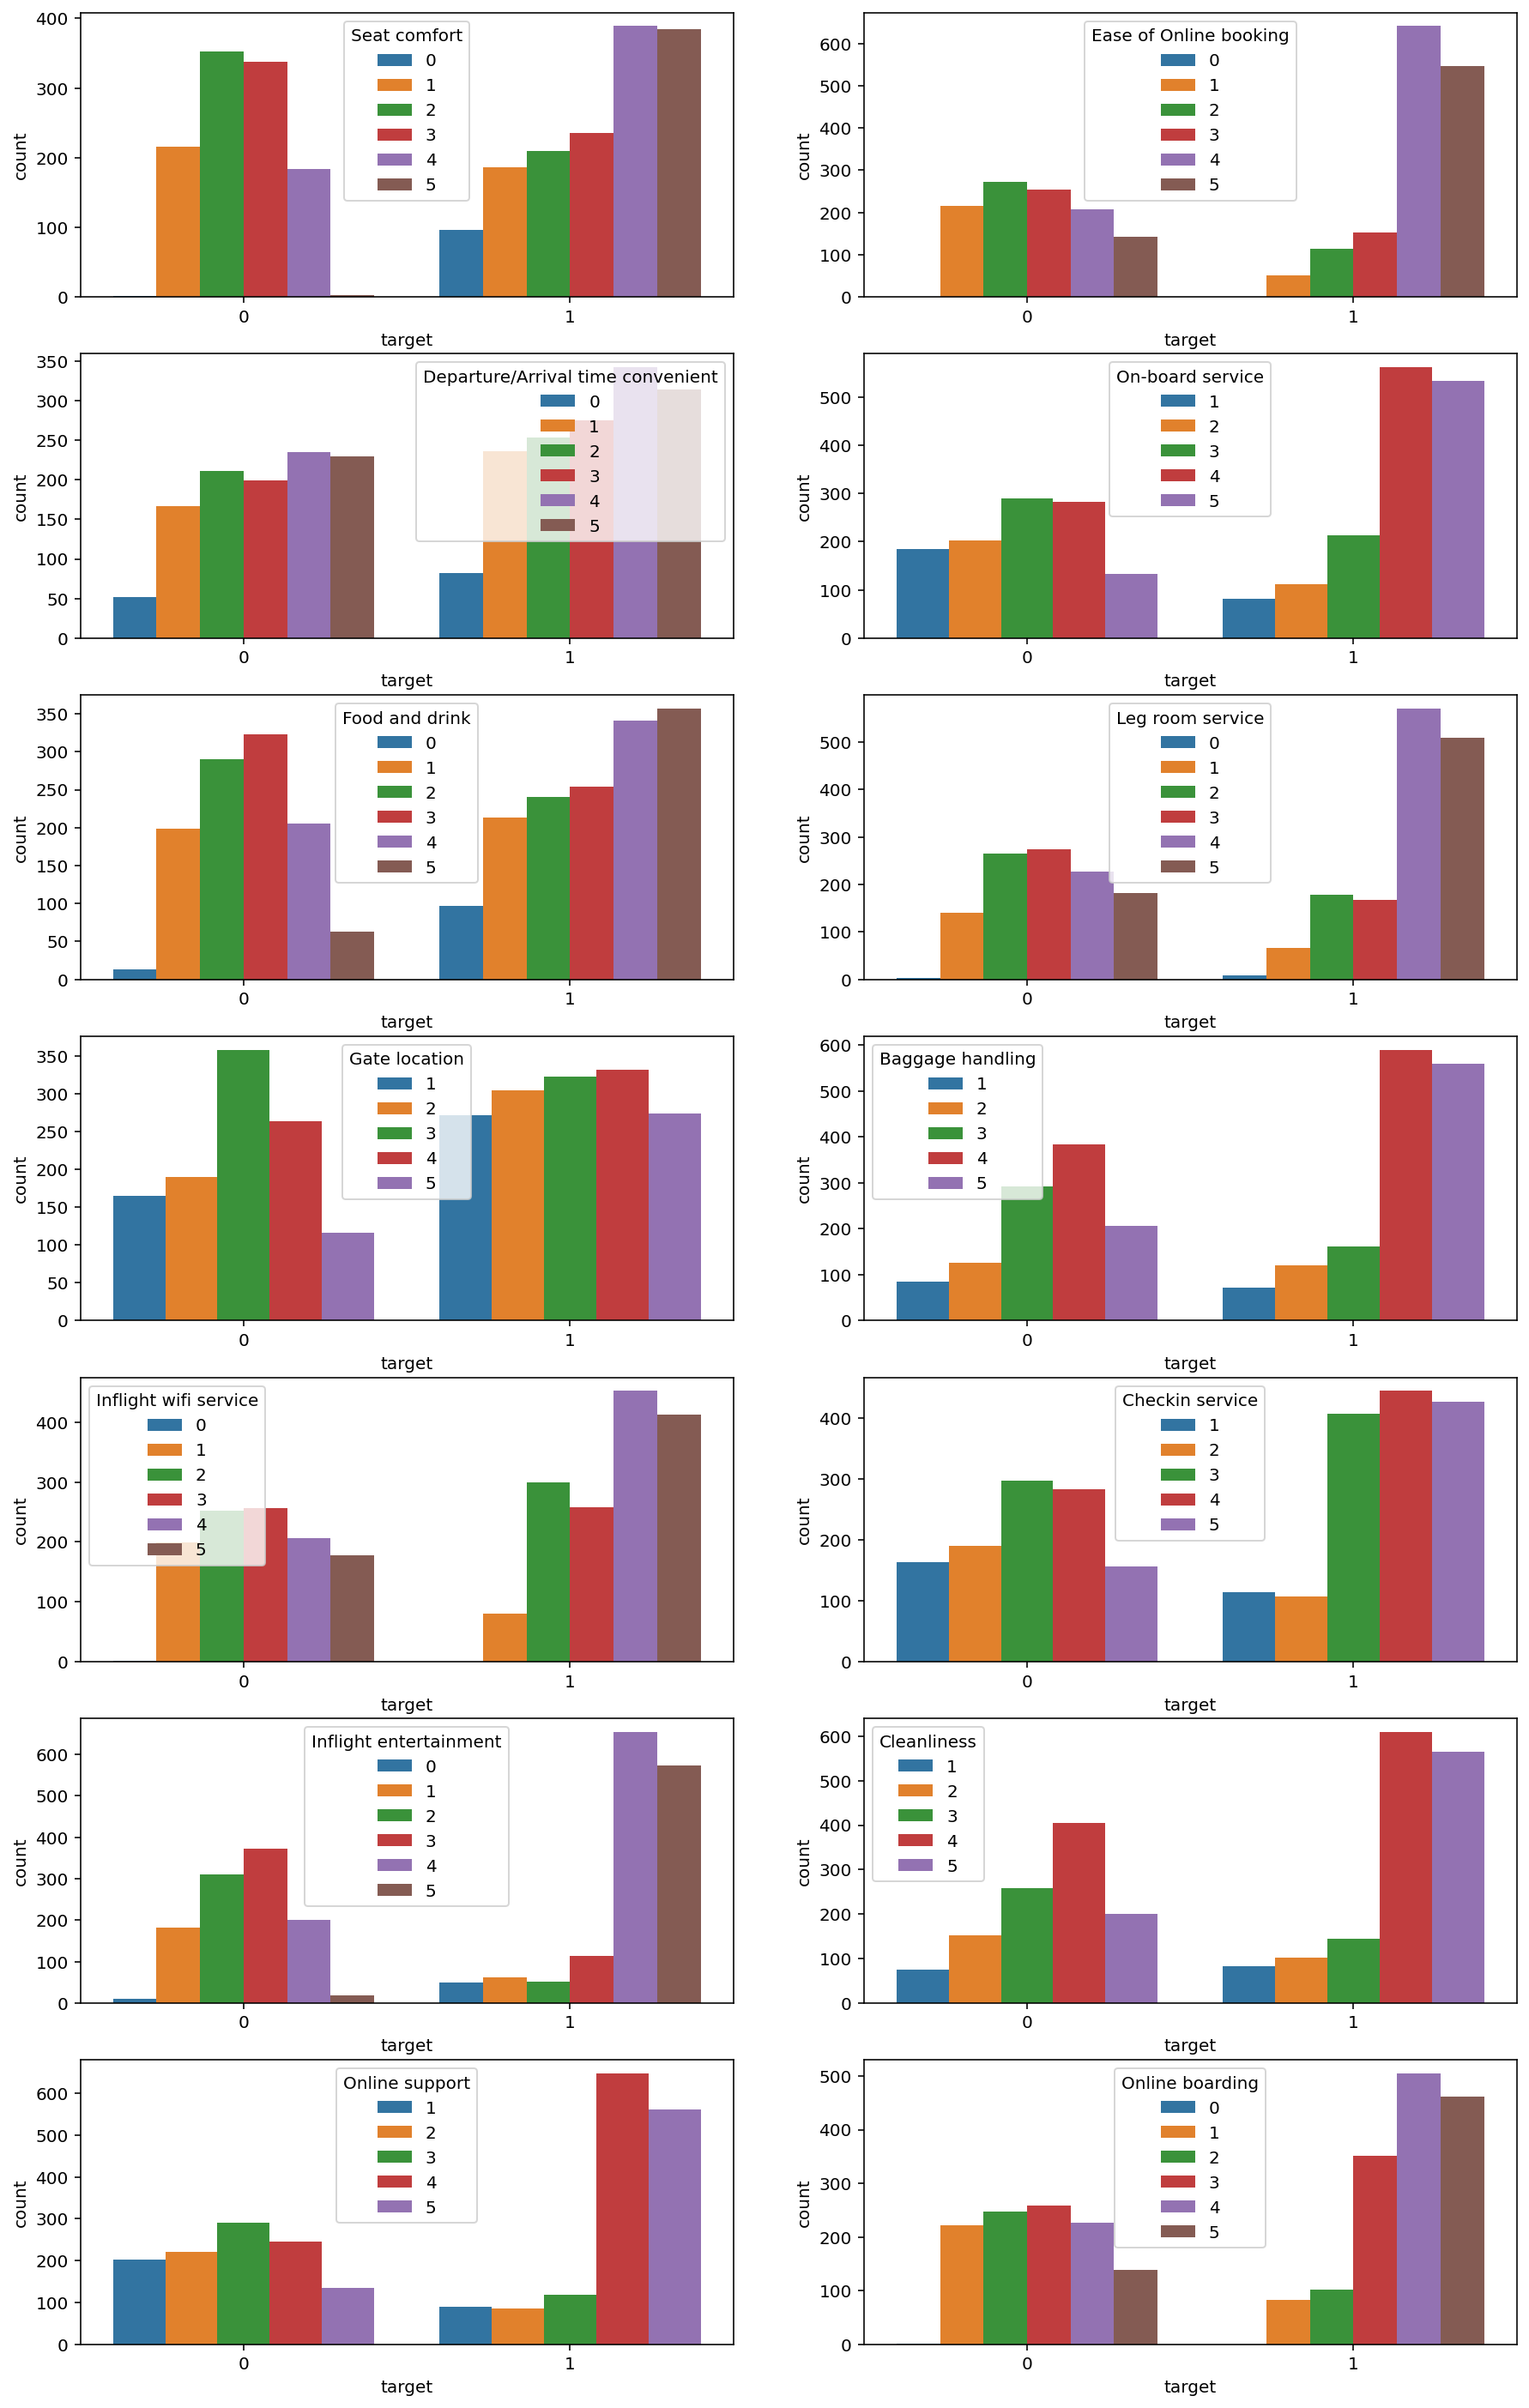

In [21]:
f, ax = plt.subplots(7, 2, figsize=(15,25))
sns.countplot(hue="Seat comfort", x="target", data=train, ax = ax[0,0])
sns.countplot(hue='Departure/Arrival time convenient', x='target', data=train, ax = ax[1,0])
sns.countplot(hue='Food and drink', x='target', data=train, ax = ax[2,0])
sns.countplot(hue='Gate location', x='target', data=train, ax = ax[3,0])
sns.countplot(hue='Inflight wifi service', x='target', data=train, ax = ax[4,0])
sns.countplot(hue='Inflight entertainment', x='target', data=train, ax = ax[5,0])
sns.countplot(hue='Online support', x='target', data=train, ax = ax[6,0])
sns.countplot(hue='Ease of Online booking', x='target', data=train, ax = ax[0,1])
sns.countplot(hue='On-board service', x='target', data=train, ax = ax[1,1])
sns.countplot(hue='Leg room service', x='target', data=train, ax = ax[2,1])
sns.countplot(hue='Baggage handling', x='target', data=train, ax = ax[3,1])
sns.countplot(hue='Checkin service', x='target', data=train, ax = ax[4,1])
sns.countplot(hue='Cleanliness', x='target', data=train, ax = ax[5,1])
sns.countplot(hue='Online boarding', x='target', data=train, ax = ax[6,1])

# 만족 그룹이 대체로 4~5점 상위 점수에 몰려있는데 반해 'Gate location'은 예외

In [22]:
corr_matrix = train.corr()
corr_matrix["target"].sort_values(ascending=False)

# Gate location, Departure/Arrival time convenient, Departure Delay in Minutes, Flight Distance, Arrival Delay in Minutes target과의 상관계수 매우 적음

target                               1.000000
Inflight entertainment               0.518167
Ease of Online booking               0.457239
Online support                       0.419631
Online boarding                      0.360176
On-board service                     0.358550
Leg room service                     0.307958
Seat comfort                         0.260098
Inflight wifi service                0.235829
Checkin service                      0.225043
Cleanliness                          0.221798
Baggage handling                     0.216629
Food and drink                       0.146890
Age                                  0.112623
Gate location                        0.016670
id                                   0.004975
Departure/Arrival time convenient    0.002155
Departure Delay in Minutes          -0.028514
Flight Distance                     -0.049122
Arrival Delay in Minutes            -0.068263
Name: target, dtype: float64

## 2. feature engineering
### 1) 범주형 변수 처리: 라벨 인코딩
* Gender
* Customer Type
* Type of Travel
* Class

In [23]:
#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

# train 데이터 라벨 인코딩
label_map = make_label_map(train) # train 사용해 label map 생성
train = label_encoder(train, label_map) # train 라벨 인코딩

train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,1,1,22,1,1,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.0,0
1,2,1,2,37,1,2,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.0,0
2,3,2,2,46,1,2,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.0,1
3,4,1,1,24,1,1,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.0,0
4,5,1,2,58,1,2,105,3,3,3,...,4,4,4,4,4,4,5,0,0.0,1


In [24]:
# test 데이터 라벨 인코딩
label_map = make_label_map(test) 
test = label_encoder(test, label_map)

test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,1,61,1,1,2037,1,1,1,...,5,5,5,5,5,3,5,3,51,58.0
1,2,1,2,27,2,2,1846,1,1,1,...,1,1,3,4,5,4,4,1,0,0.0
2,3,1,1,52,2,2,1622,4,4,4,...,4,5,5,5,5,4,5,3,0,0.0
3,4,2,1,54,2,2,3534,4,4,4,...,5,2,2,2,2,5,2,1,0,0.0
4,5,1,1,41,2,1,1471,4,3,3,...,4,4,3,1,2,5,4,4,0,0.0


### 2) 연속형 변수 처리 : 정규화
* Age
* Flight Distance
* Departure Delay in Minutes
* Arrival Delay in Minutes

In [25]:
from sklearn.preprocessing import MinMaxScaler

num_features = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']

scaler = MinMaxScaler()
train[num_features] = scaler.fit_transform(train[num_features]) 
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,1,1,0.205479,1,1,0.226501,3,0,3,...,4,5,4,4,4,5,4,0.000000,0.0000,0
1,2,1,2,0.410959,1,2,0.403807,2,4,4,...,5,5,4,2,1,5,2,0.346154,0.5625,0
2,3,2,2,0.534247,1,2,0.376281,1,1,1,...,4,4,4,4,5,4,3,0.000000,0.0000,1
3,4,1,1,0.232877,1,1,0.336164,3,3,3,...,3,2,4,5,3,4,3,0.192308,0.0625,0
4,5,1,2,0.698630,1,2,0.007760,3,3,3,...,4,4,4,4,4,4,5,0.000000,0.0000,1


In [26]:
test[num_features] = scaler.fit_transform(test[num_features]) 
test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,1,0.692308,1,1,0.304708,1,1,1,...,5,5,5,5,5,3,5,3,0.113839,0.130337
1,2,1,2,0.256410,2,2,0.275418,1,1,1,...,1,1,3,4,5,4,4,1,0.000000,0.000000
2,3,1,1,0.576923,2,2,0.241067,4,4,4,...,4,5,5,5,5,4,5,3,0.000000,0.000000
3,4,2,1,0.602564,2,2,0.534274,4,4,4,...,5,2,2,2,2,5,2,1,0.000000,0.000000
4,5,1,1,0.435897,2,1,0.217911,4,3,3,...,4,4,3,1,2,5,4,4,0.000000,0.000000


### 3) id 분리, 중요하지 않은 칼럼 삭제

In [27]:
# id 제거, 분리
train.drop(axis = 1, columns = 'id', inplace = True)

ID = test['id']

test.drop(axis = 1, columns = 'id', inplace = True)
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,1,0.692308,1,1,0.304708,1,1,1,1,...,5,5,5,5,5,3,5,3,0.113839,0.130337
1,1,2,0.256410,2,2,0.275418,1,1,1,4,...,1,1,3,4,5,4,4,1,0.000000,0.000000
2,1,1,0.576923,2,2,0.241067,4,4,4,4,...,4,5,5,5,5,4,5,3,0.000000,0.000000
3,2,1,0.602564,2,2,0.534274,4,4,4,4,...,5,2,2,2,2,5,2,1,0.000000,0.000000
4,1,1,0.435897,2,1,0.217911,4,3,3,3,...,4,4,3,1,2,5,4,4,0.000000,0.000000


In [28]:
# Corelation이 적은 Gate location, Departure/Arrival time convenient, Departure Delay in Minutes, Flight Distance, Arrival Delay in Minutes target 삭제

train.drop(['Gate location', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Flight Distance', 'Arrival Delay in Minutes'], axis = 1, inplace = True)
test.drop(['Gate location', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Flight Distance', 'Arrival Delay in Minutes'], axis = 1, inplace = True)

## 3. 모델 학습 및 비교
### 1) 모델 개별 비교

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
train_label = train['target']
train.drop(['target'], axis = 1, inplace= True)

In [31]:
random_state = 2022
X_train, X_test, y_train, y_test = train_test_split(train, train_label, random_state=random_state, test_size=0.2)

Tree = DecisionTreeClassifier(random_state = random_state)
Forest = RandomForestClassifier(random_state = random_state)
SVM = svm.SVC()
SGD = SGDClassifier()
xgboost = XGBClassifier(random_state=random_state)
lightgbm = LGBMClassifier(random_state=random_state)
rdforest = RandomForestClassifier(random_state=random_state)

In [32]:
Tree.fit(X_train, y_train)
y_pred = Tree.predict(X_test)
print("\t<Classification Report of Descision Tree>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Descision Tree>

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       218
           1       0.89      0.92      0.91       301

    accuracy                           0.89       519
   macro avg       0.89      0.88      0.89       519
weighted avg       0.89      0.89      0.89       519



In [33]:
Forest.fit(X_train, y_train)
y_pred = Forest.predict(X_test)
print("\t<Classification Report of Ramdom Forest>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Ramdom Forest>

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       218
           1       0.93      0.93      0.93       301

    accuracy                           0.92       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.92      0.92      0.92       519



In [34]:
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
print("\t<Classification Report of Support Vector Machine>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Support Vector Machine>

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       218
           1       0.91      0.91      0.91       301

    accuracy                           0.90       519
   macro avg       0.90      0.89      0.90       519
weighted avg       0.90      0.90      0.90       519



In [35]:
SGD.fit(X_train, y_train)
y_pred = SGD.predict(X_test)
print("\t<Classification Report of Stochastic Gradient Descent Classifier>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Stochastic Gradient Descent Classifier>

              precision    recall  f1-score   support

           0       0.83      0.56      0.67       218
           1       0.74      0.92      0.82       301

    accuracy                           0.77       519
   macro avg       0.79      0.74      0.74       519
weighted avg       0.78      0.77      0.76       519



In [36]:
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
    
print("\t<Classification Report of XGB Classifier>\n")
print(classification_report(y_test, y_pred))

[00:15:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
	<Classification Report of XGB Classifier>

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       218
           1       0.93      0.93      0.93       301

    accuracy                           0.92       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.92      0.92      0.92       519



In [37]:
lightgbm.fit(X_train, y_train)
y_pred = lightgbm.predict(X_test)

print("\t<Classification Report of LGBM Classifier>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of LGBM Classifier>

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       218
           1       0.92      0.93      0.93       301

    accuracy                           0.92       519
   macro avg       0.92      0.91      0.91       519
weighted avg       0.92      0.92      0.92       519



In [38]:
rdforest.fit(X_train, y_train)
y_pred = rdforest.predict(X_test)
    
print("\t<Classification Report of Random Forest Classifier>\n")
print(classification_report(y_test, y_pred))

	<Classification Report of Random Forest Classifier>

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       218
           1       0.93      0.93      0.93       301

    accuracy                           0.92       519
   macro avg       0.92      0.92      0.92       519
weighted avg       0.92      0.92      0.92       519



### 2) Scikit-Learn 모델 Ensamble
Decision Tree, Random Forest, SVM Ensamble 시도

In [39]:
models = [{'model':Tree}, {'model':Forest}, {'model':SVM}]

def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x) for m in models
    ])
    return np.mean(predictions, axis=1)

In [40]:
y_pred = AveragingBlending(models, X_train, y_train, X_test)

In [41]:
for i in range(len(y_pred)):
    y_pred[i] = round(y_pred[i])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       218
           1       0.92      0.94      0.93       301

    accuracy                           0.92       519
   macro avg       0.92      0.91      0.91       519
weighted avg       0.92      0.92      0.91       519



### 3) 결과물 제출

In [43]:
prediction = AveragingBlending(models, X_train, y_train, test)
for i in range(len(prediction)):
    prediction[i] = round(prediction[i])
submission = pd.DataFrame({"id": ID, "target": prediction})
submission.to_csv("submission5.csv", index=False)